In [2]:
# Import Needed Packages
import matplotlib.pyplot as plt
import cv2

In [3]:
def plt_imshow(title,image):
    # Convert Image From BGR To RGB And Display
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [5]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", type=str, required=True,
# 	help="path to input image")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "images/opencv_logo.png"
}

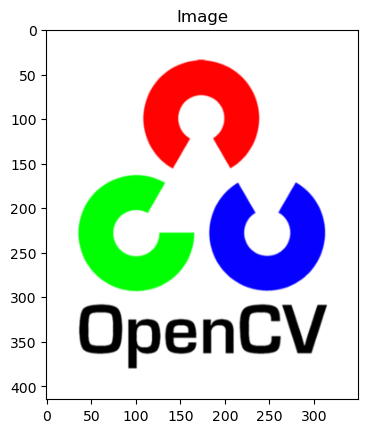

In [6]:
# Load And Display Image
image = cv2.imread(args["image"])
plt_imshow("Image", image)

In [7]:
# Convert Image To Grayscale And Slightly Blur
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7,7), 0)

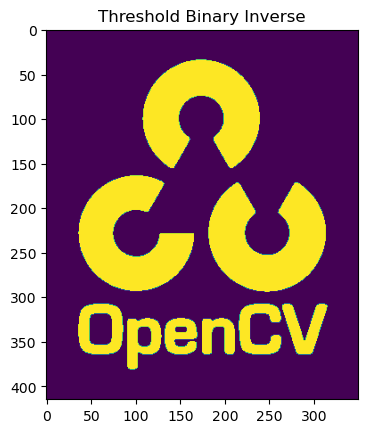

In [8]:
# Apply Basic Thresholding
# First Param Is The Image We Want To Threshold
# Second Param Is Out Threshold Check -- If A Pixel Value
# Is Greater Than Our THreshold (In This Case, 200), It Is
# Set To Black (0), Otherwise It Is Set To White (255).
(T, threshInv) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)
plt_imshow("Threshold Binary Inverse", threshInv)

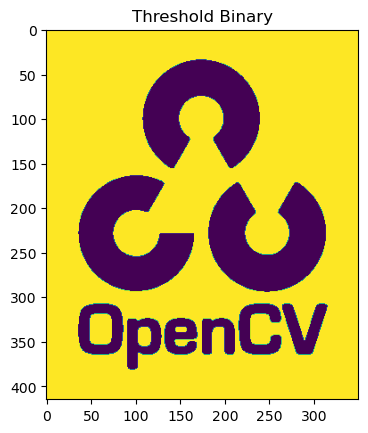

In [9]:
# Using Normal Thresholding (Rather Than Inverse)
(T, thresh) = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
plt_imshow("Threshold Binary", thresh)

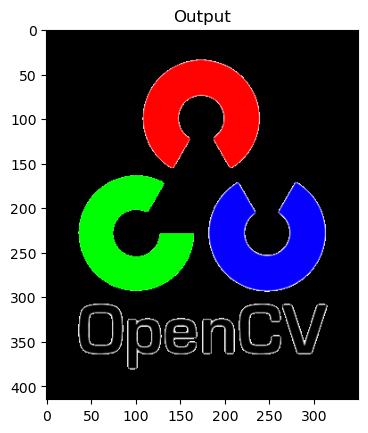

In [10]:
# Visualize Only Masked Regions In Image
masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output", masked)

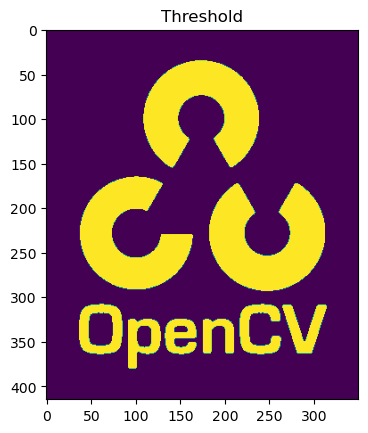

[INFO] Otsu's Thresholding Value: 166.0


In [11]:
# Apply Otsu's Automatic Thresholding
# (Which Determines The Best Treshold Value)
(T, threshInv) = cv2.threshold(blurred, 0, 255, 
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt_imshow("Threshold", threshInv)
print("[INFO] Otsu's Thresholding Value: {}".format(T))

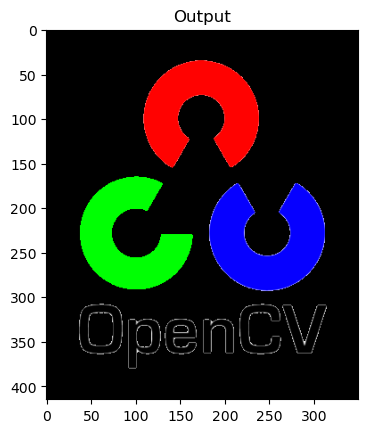

In [12]:
# Visualize Only Masked Values Of Image
masked = cv2.bitwise_and(image, image, mask=threshInv)
plt_imshow("Output", masked)